In [1]:
import pingouin as pg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregar dataset
df_rentalprice = pd.read_csv(r'C:\Users\User\PROJETOS\modelo_aluguel\dataset\dataset_aluguel.csv')

In [3]:
# Checando estrutura do arquivo
df_rentalprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


In [4]:
# Remover coluna ID
df_rentalprice.drop(columns=['id'], axis=1, inplace=True)

In [5]:
# Copiar df para df EDA
df_rentalprice_eda = df_rentalprice.copy()
# Copiar df para df Bucketing
df_rentalprice_bucketing = df_rentalprice.copy()

## EDA

In [6]:
# Visualizar os dados
df_rentalprice_eda.head(10)

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396
5,73.399178,5,8.747746,1,True,False,2141.303241
6,58.712542,3,49.108417,1,True,False,1625.680981
7,179.926422,5,25.831795,0,False,True,2854.591908
8,140.167252,4,13.041459,1,True,False,2702.673542
9,156.210887,5,49.812685,1,False,False,2456.538289


In [7]:
# Detectar valores ausentes
df_rentalprice_eda.isna().sum()

tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_Periferia    0
localizacao_Subúrbio     0
valor_aluguel            0
dtype: int64

In [8]:
# Medidas estatisticas do df
df_rentalprice_eda.describe()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


In [9]:
# Coletar medidas das variaveis numéricas
mediana_tamanho_m2 = df_rentalprice_eda.median()
mediana_idade_casa = df_rentalprice_eda.median()
mediana_n_quartos = df_rentalprice_eda.median()
mediana_garagem = df_rentalprice_eda.median()

In [10]:
# Coletar medidas das variaveis booleanas
moda_localizacao_suburbio = df_rentalprice_eda.localizacao_Subúrbio.mode()
moda_localizacao_periferia = df_rentalprice_eda.localizacao_Periferia.mode()

In [11]:
 # Converter tamanho_m2 e idade_casa para números inteiros
df_rentalprice_eda.tamanho_m2 = df_rentalprice_eda.tamanho_m2.astype(int)
df_rentalprice_eda.idade_casa = df_rentalprice_eda.idade_casa.astype(int)

In [12]:
# Estrutura do df
df_rentalprice_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamanho_m2             100 non-null    int64  
 1   n_quartos              100 non-null    int64  
 2   idade_casa             100 non-null    int64  
 3   garagem                100 non-null    int64  
 4   localizacao_Periferia  100 non-null    bool   
 5   localizacao_Subúrbio   100 non-null    bool   
 6   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(1), int64(4)
memory usage: 4.2 KB


In [13]:
# Visualizar dados
df_rentalprice_eda.head(10)

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106,1,36,0,True,False,1767.122088
1,192,4,10,1,True,False,3278.742397
2,159,5,27,1,True,False,2953.899737
3,139,4,34,1,False,True,2514.717108
4,73,5,11,0,False,True,1942.164396
5,73,5,8,1,True,False,2141.303241
6,58,3,49,1,True,False,1625.680981
7,179,5,25,0,False,True,2854.591908
8,140,4,13,1,True,False,2702.673542
9,156,5,49,1,False,False,2456.538289


<Axes: xlabel='tamanho_m2'>

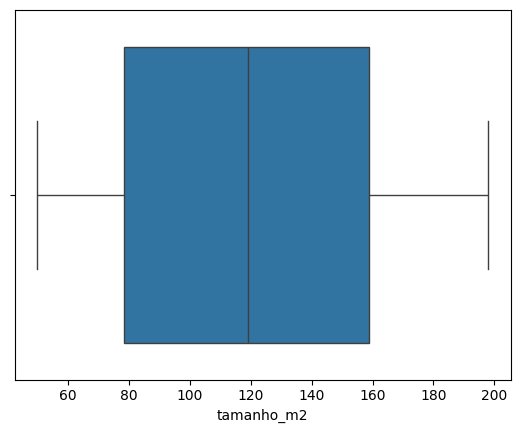

In [14]:
# Detectar outliers
sns.boxplot(data=df_rentalprice_eda, x='tamanho_m2')

<Axes: xlabel='n_quartos'>

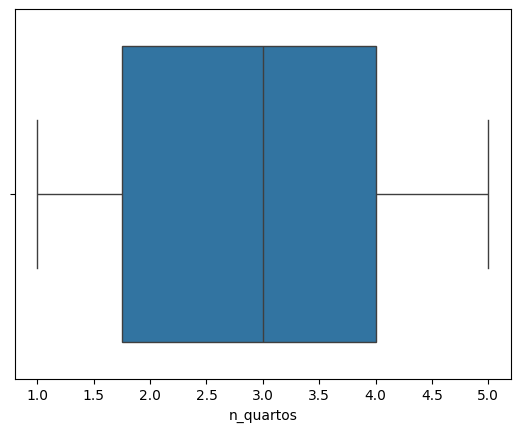

In [15]:
sns.boxplot(data=df_rentalprice_eda, x='n_quartos')

<Axes: xlabel='idade_casa'>

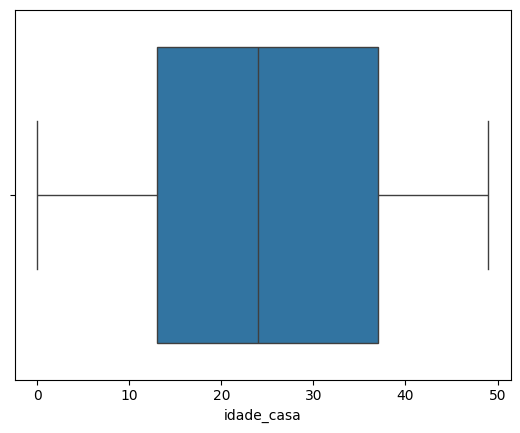

In [16]:
sns.boxplot(data=df_rentalprice_eda, x='idade_casa')

<Axes: xlabel='valor_aluguel'>

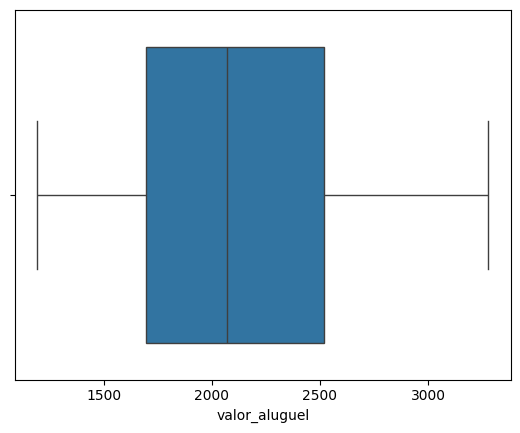

In [17]:
sns.boxplot(data=df_rentalprice_eda, x='valor_aluguel')

<Axes: xlabel='localizacao_Periferia', ylabel='valor_aluguel'>

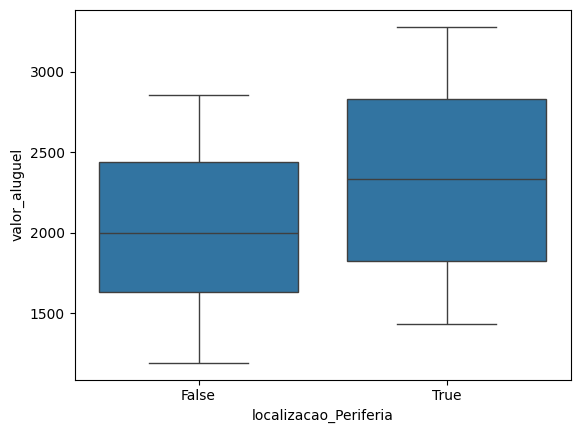

In [18]:
# Cruzamento de variaveis booleanas com valor_aluguel
sns.boxplot(data=df_rentalprice_eda, x='localizacao_Periferia', y='valor_aluguel')

<Axes: xlabel='localizacao_Subúrbio', ylabel='valor_aluguel'>

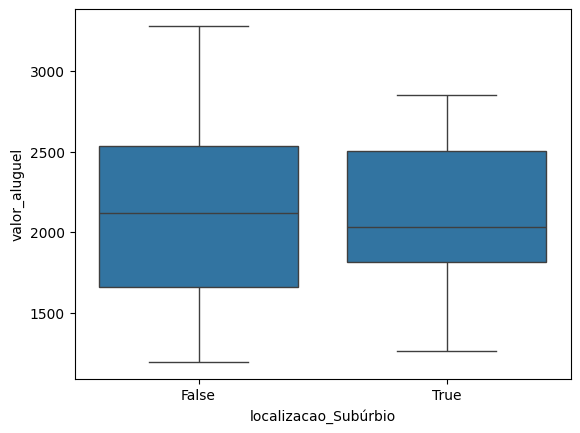

In [19]:
sns.boxplot(data=df_rentalprice_eda, x='localizacao_Subúrbio', y='valor_aluguel')

<Axes: xlabel='tamanho_m2', ylabel='valor_aluguel'>

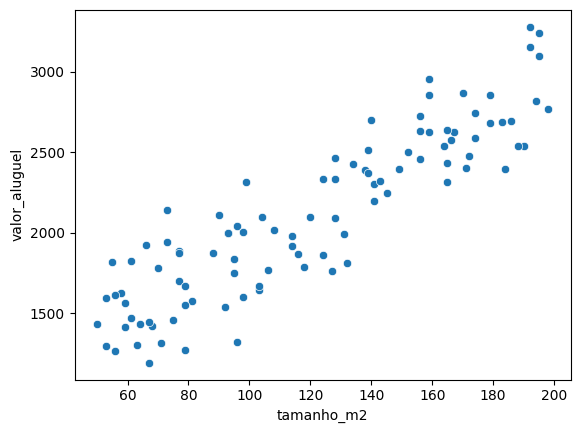

In [20]:
# Cruzamento de variaveis numericas com nivel de colesterol
sns.scatterplot(data=df_rentalprice_eda, x='tamanho_m2', y='valor_aluguel')

<Axes: xlabel='n_quartos', ylabel='valor_aluguel'>

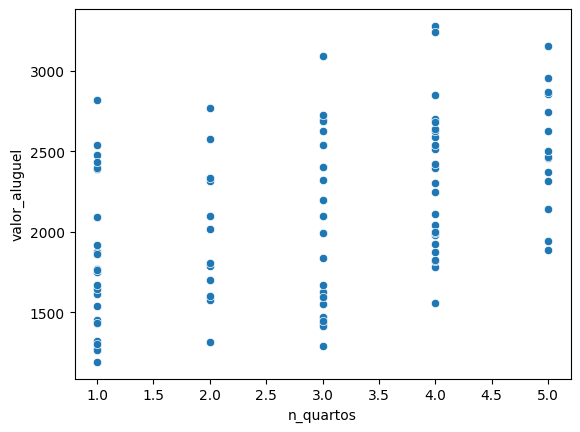

In [21]:
sns.scatterplot(data=df_rentalprice_eda, x='n_quartos', y='valor_aluguel')

<Axes: xlabel='idade_casa', ylabel='valor_aluguel'>

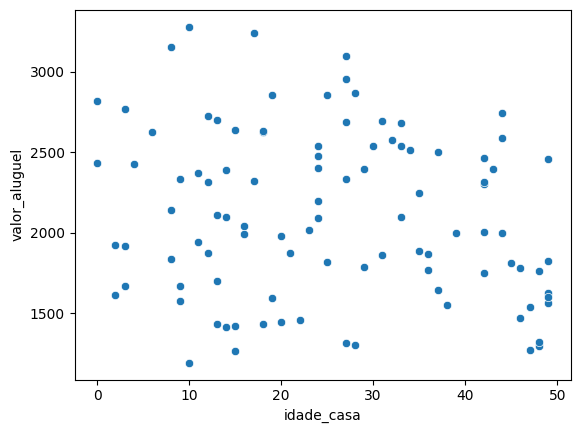

In [22]:
sns.scatterplot(data=df_rentalprice_eda, x='idade_casa', y='valor_aluguel')

<Axes: xlabel='garagem', ylabel='valor_aluguel'>

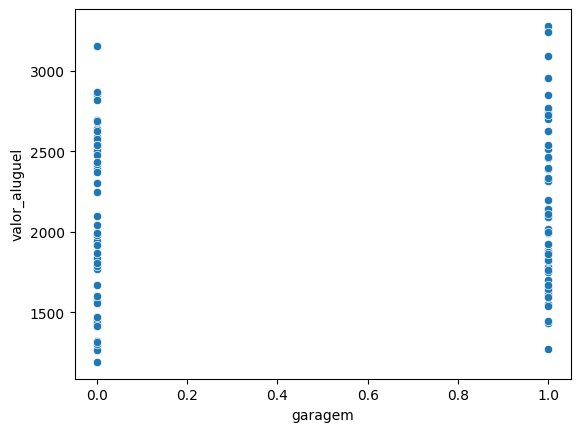

In [23]:
sns.scatterplot(data=df_rentalprice_eda, x='garagem', y='valor_aluguel')

In [24]:
df_rentalprice_eda.head(10)

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106,1,36,0,True,False,1767.122088
1,192,4,10,1,True,False,3278.742397
2,159,5,27,1,True,False,2953.899737
3,139,4,34,1,False,True,2514.717108
4,73,5,11,0,False,True,1942.164396
5,73,5,8,1,True,False,2141.303241
6,58,3,49,1,True,False,1625.680981
7,179,5,25,0,False,True,2854.591908
8,140,4,13,1,True,False,2702.673542
9,156,5,49,1,False,False,2456.538289


In [25]:
df_rentalprice_eda.head(10)

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106,1,36,0,True,False,1767.122088
1,192,4,10,1,True,False,3278.742397
2,159,5,27,1,True,False,2953.899737
3,139,4,34,1,False,True,2514.717108
4,73,5,11,0,False,True,1942.164396
5,73,5,8,1,True,False,2141.303241
6,58,3,49,1,True,False,1625.680981
7,179,5,25,0,False,True,2854.591908
8,140,4,13,1,True,False,2702.673542
9,156,5,49,1,False,False,2456.538289


<Axes: >

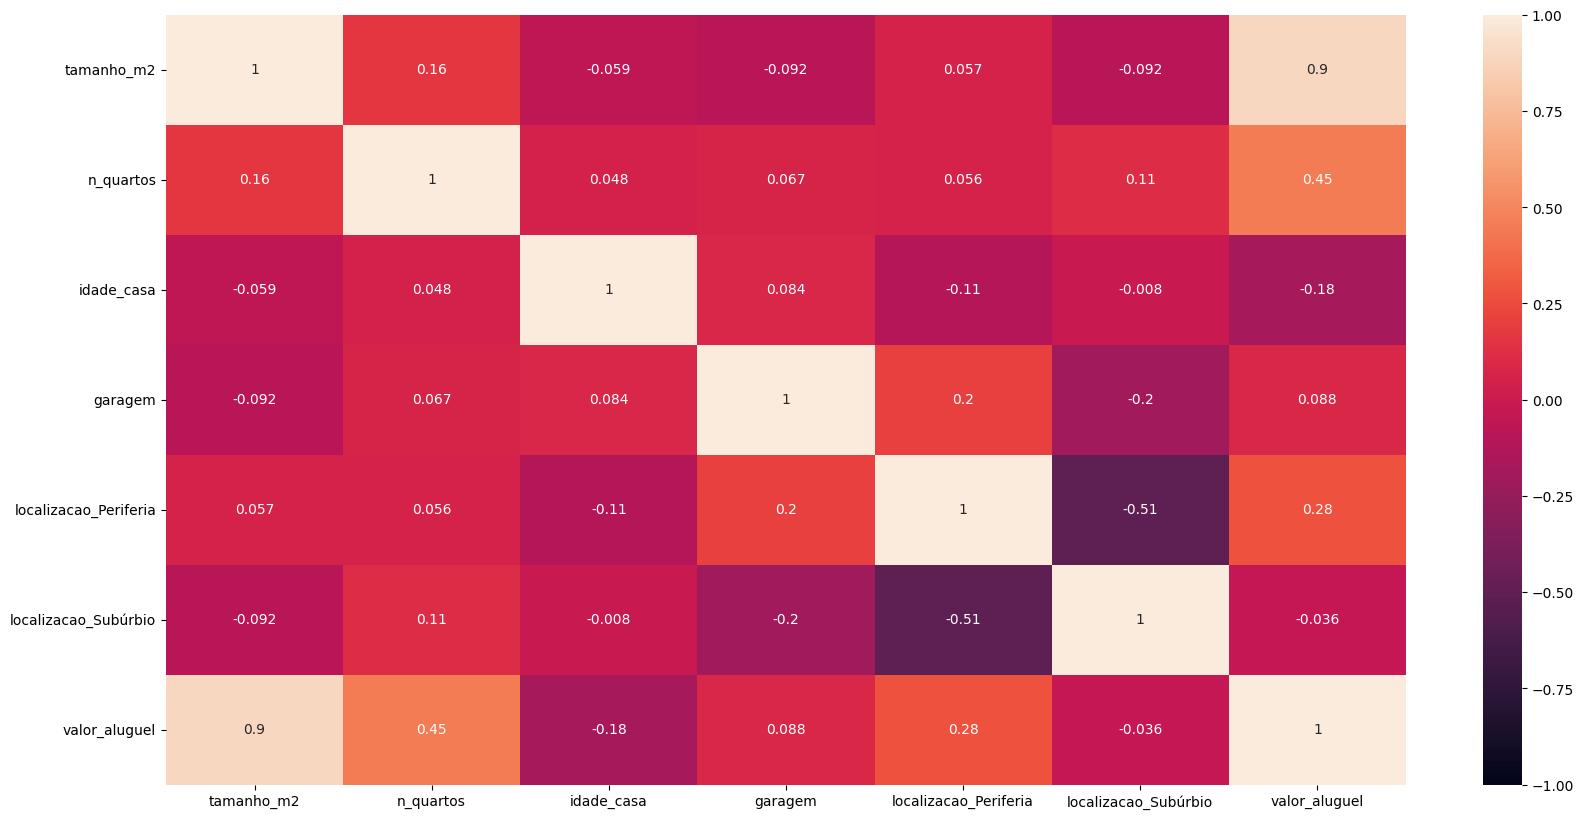

In [26]:
# Heatmap de correlação entre as variaveis
plt.figure(figsize=(20,10))
sns.heatmap(df_rentalprice_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

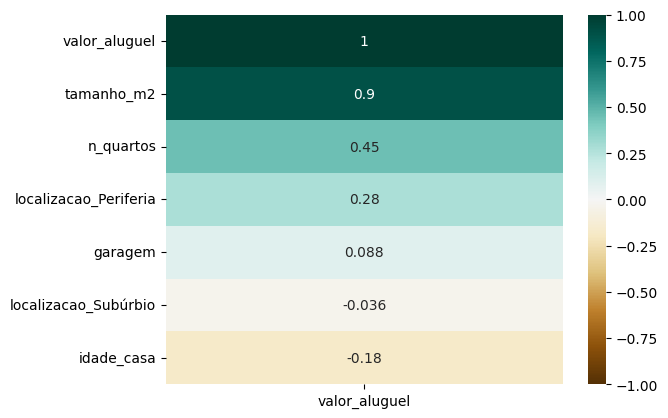

In [27]:
# Ranking de correlação com a variavel target (valor_aluguel)
sns.heatmap(df_rentalprice_eda.corr()[['valor_aluguel']].sort_values(by='valor_aluguel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Treinando modelo

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [29]:
# Criar dataset de treino e teste
X= df_rentalprice.drop(columns='valor_aluguel', axis=1)
y= df_rentalprice['valor_aluguel']

In [30]:
df_rentalprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamanho_m2             100 non-null    float64
 1   n_quartos              100 non-null    int64  
 2   idade_casa             100 non-null    float64
 3   garagem                100 non-null    int64  
 4   localizacao_Periferia  100 non-null    bool   
 5   localizacao_Subúrbio   100 non-null    bool   
 6   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [31]:
# Split dataset (treino e teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [32]:
y_test.shape

(30,)

In [33]:
# Pipeline
# Imputar moda nas variaveis categóricas - grupo_sanguineo, fumante, nivel_atividade_fisica
# Padronizar variaveis numericas - idade, altura, peso
# OneHotEncode nas variaveis categóricas nominais - grupo_sanguineo, fumante
# OrdinalEncode nas variaveis categoricas ordinais - nivel_atividade_fisica
# Imputar mediana nas variaveis numericas - idade, altura, peso

# Nomes das colunas
colunas_categoricas = ['localizacao_Periferia', 'localizacao_Subúrbio']
colunas_numericas = ['tamanho_m2', 'n_quartos', 'idade_casa', 'garagem']


In [34]:
transformer_categoricas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [36]:
# Criar um columntransformer que encapsula as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas),
        ('cat', transformer_categoricas, colunas_categoricas),
    ]
)

In [37]:
# Criando Pipeline principal = pre processamento + treinamento
model_regr = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Treinar modelo
model_regr.fit(X_train, y_train)

ValueError: SimpleImputer does not support data with dtype bool. Please provide either a numeric array (with a floating point or integer dtype) or categorical data represented either as an array with integer dtype or an array of string values with an object dtype.

In [ ]:
print(type(X_train))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(X_train.columns.tolist())


['tamanho_m2', 'n_quartos', 'idade_casa', 'garagem', 'localizacao_Periferia', 'localizacao_Subúrbio']
